<a href="https://colab.research.google.com/github/jarrodsb/DSPS_JBieber/blob/main/HW4/Bieber_MWrotCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jarrod Bieber - PHYS 461 Homework 4

---



prepared by federica b bianco @fedhere
for UDel DSPS PHYS 461/661

# testing the "significance" of Dark Matter

In [358]:
...

#package I will use for constants and units conversion
import astropy
from astropy.constants import G

#package used to display latex formulae
from IPython.display import Latex

# Jarrod's Imports
import pandas as pd
import numpy as np
from textwrap import wrap
import matplotlib.pyplot as plt
from astropy import units as u


In 1970 Vera Rubin published a seminal paper: she measured the rotational speed of HII regions in several galaxies and how it changed as a function of distance to the center of the galaxy. If we believe Newtonian gravity (or GR for that matter) we expect that _once all of the mass is included_, i.e. at a radius distance from the center of the galaxy larger than the radius of the galaxy itself, the rotational speed will be proportional to $v^2\propto\frac{1}{r}$

You will use astropy in this exercise, a popular and powerfull package for astrophysical analysis in python. One of the most interesting and unique characteristics of astropy is that it allows treatment of units. When you have a quantity (say `x=3`) in python you can express it with the appropriate units (say meters) as `x=3 * u.meter`

In [359]:
#example
x = 3
x

3

In [360]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now for visibility. Please move it to the top cell
from astropy import units as u
x_in_m = x * u.meter
x_in_m

<Quantity 3. m>

once the quantities have units they can be converted with astropy methods: e.g.

In [361]:
x_in_km = x_in_m.to(u.kilometer)
x_in_km

<Quantity 0.003 km>

## Propagation of  uncertainties rules

below are the basic rules for propagation of uncertainties - use [this as reference](https://github.com/fedhere/DSPS/blob/master/resources/Managing%20Errors%20and%20Uncertainty.pdf)




$$
\begin{eqnarray}
z = x  \pm y  ~| & ~  &dz = \sqrt{dx^2 + dy^2}
\\
z = x * y  ~| & ~& dz = |xy|  \sqrt{\left(\frac{dx}{x}\right)^2 +
                                \left(\frac{dy}{y}\right)^2} \\
z = x / y  ~| & ~& dz = \left|\frac{x}{y}\right| \sqrt{\left(\frac{dx}{x}\right)^2 +
                                                   \left(\frac{dy}{y}\right)^2} \\
z = x^n ~| & ~& dz = |n| ~ x^{n-1}  dx \\
z = \mathrm{c}x ~| & ~& dz = |\mathrm{c}| ~dx \\
z = f(x, y) ~| & ~& dz = \sqrt{\left(\frac{\partial f}{\partial x}\right)^2 dx^2 +\left(\frac{\partial f}{\partial y}\right)^2 dy^2} \\
\end{eqnarray}
$$


# let's assume a Newtonian framework:
the velocity of a body in orbit depends only on the gravitational field of the mass that attracts it, and we can assume that mass is concentrated in the center of mass  (the geometric center for simplicity) of the system

with G the gravitational constant, $r$ the radius, and $m(r)$ the mass contained within that radius we have the orbital velocity $v$:



$v^2 = \frac{G \cdot m(r)}{r}$


Assignment: Derive this $v^2 \propto\frac{1}{r}$ at different distances from the center of the Galaxy for M31 and the Milky Way from Newron's law $F~=~\frac{GMm}{r^2}$.

Write each formula you use and describe each step in text cells within this notebook.

You can use latex to write the formulate(you really just need to know ```\frac{}``` for the fractions and ```^``` for the powers) and this reference
https://www.physicsclassroom.com/calcpad/circgrav


---


## M31 rotational curve

---



### data ingestion
Orignal data in https://academic.oup.com/pasj/article-abstract/67/4/75/1536635?redirectedFrom=fulltext&login=false but I converted it to csv already for you

Get the data from the github repository https://github.com/fedhere/DSPS_FBianco/tree/master/HW4 : there are 2 files: mw.csv for the Millky Way and m31.csv for M31,the Andromeda galaxy. Start with M31,  Vera Rubin's original target.

Note that the data contains 2 types of uncertainties: one significantly smaller than the other. The ```dv``` uncertainty derived by propagating the uncertainty in the measured  wavelength of the HII line. The uncertainty called ```err``` is the remaining error budget. To include all sources combine in quadrature the uncertiainties `dv` and `err` and call that `err_tot` including _all_ sources of uncertainty and not just the uncertainty in measuring the location of the line. Retain both, you will test your hypothesis with each one to see if it matters which uncertainty you choose

In [362]:
m31 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/HW4/m31.csv", skiprows=1, sep=",")
m31.columns

Index(['#R(kpc', 'V(km/s)', 'St.dev.', 'St.error'], dtype='object')

In [363]:
m31 = m31.rename({"#R(kpc": "r", "V(km/s)": "v", "St.dev.": "dv", "St.error": "err"}, axis=1)

In [364]:
m31["err_tot"] = np.hypot(m31["dv"], m31["err"])

In [365]:

m31.head()

,r,v,dv,err,err_tot
0,0.100,183.939,0.000,0.000,0.000000
1,0.120,190.710,10.265,12.191,15.937086
2,0.144,204.141,22.634,21.808,31.430667
3,0.173,207.601,4.573,4.200,6.209052
4,0.207,210.188,3.943,3.258,5.114862


In [366]:
m31.tail()

,r,v,dv,err,err_tot
50,910.046,250.377,141.353,22.663,143.158242
51,1092.055,241.900,138.657,39.031,144.045766
52,1310.466,235.039,103.480,46.508,113.450890
53,1572.559,332.734,109.504,54.110,122.143433
54,1887.071,414.942,69.579,27.931,74.975849


# exploratory data analysis
proceed with at least a few basic exploratory tasks

- what is the shape of the dataset?

- what are the statistical properties of the dataset? like the mean and variance of each column etc etc? do you remember how to get them with a single python line of code?

Look at the mean and the median of each column - what can you say about the distribution based on the comparison of these two numbers?

In [367]:
m31.shape

(55, 5)

In [368]:
m31.describe()

,r,v,dv,err,err_tot
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855,57.781110
std,415.523904,42.799892,49.254792,14.876951,50.970282
min,0.100000,121.974000,0.000000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000,12.956817
50%,13.737000,229.124000,30.697000,12.065000,32.684957
75%,161.675000,244.102500,99.980000,23.641000,107.040605
max,1887.071000,414.942000,147.835000,54.110000,152.201397


> The distribution of rotational velocities of HII regions is nearly symmetrical, despite the HII regions being far from the center (over 200 kpc) on average. At first glance, the matter does not appear to be following the $\frac{1}{r^2}$ rule.

Make a histogram of each column of the dataframe and comment on the shape of the distribution in the caption. Remember the axis labels which, when we work with physical quantities, shoudl also state what units are used.

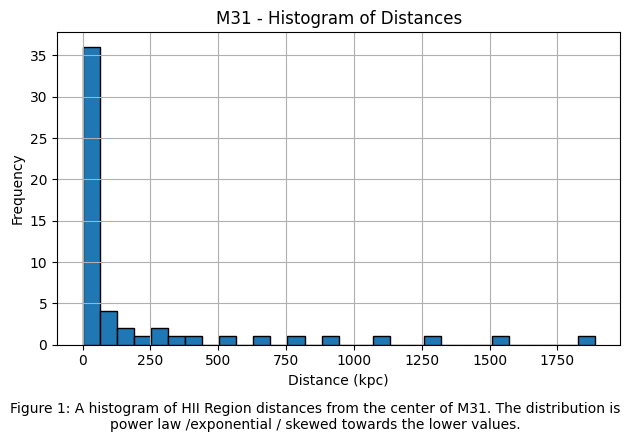

In [369]:
caption = "Figure 1: A histogram of HII Region distances from the center of M31. The distribution is power law /exponential / skewed towards the lower values."

plt.hist(m31["r"], bins=30, edgecolor='black', log=False)
plt.title("M31 - Histogram of Distances")
plt.xlabel("Distance (kpc)")
plt.ylabel("Frequency")
plt.grid()
plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.15, 1, 1])

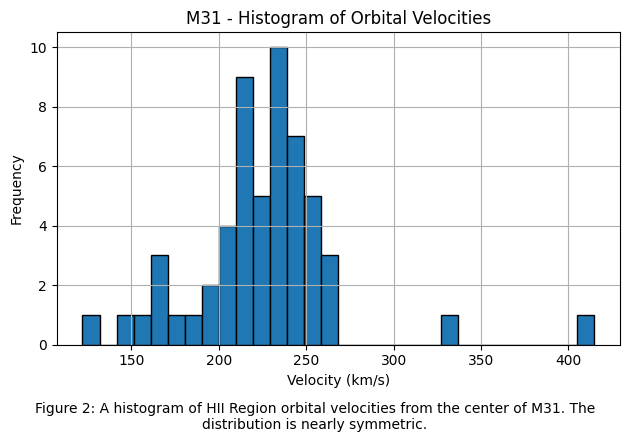

In [370]:
caption = "Figure 2: A histogram of HII Region orbital velocities from the center of M31. The distribution is nearly symmetric."

plt.hist(m31["v"], bins=30, edgecolor='black', log=False)
plt.title("M31 - Histogram of Orbital Velocities")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Frequency")
plt.grid()
plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.15, 1, 1])

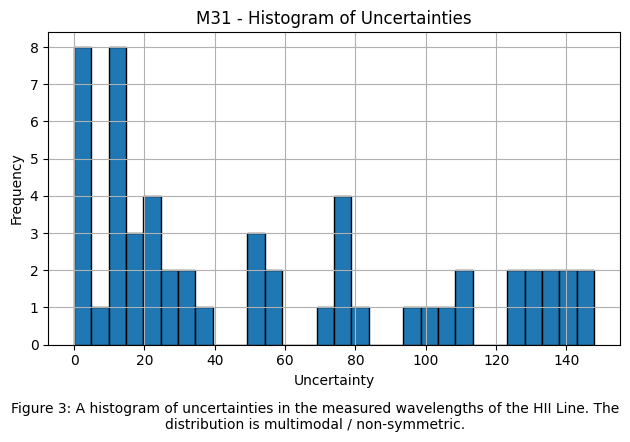

In [371]:
caption = "Figure 3: A histogram of uncertainties in the measured wavelengths of the HII Line. The distribution is multimodal / non-symmetric."

plt.hist(m31["dv"], bins=30, edgecolor='black', log=False)
plt.title("M31 - Histogram of Uncertainties")
plt.xlabel("Uncertainty")
plt.ylabel("Frequency")
plt.grid()
plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.15, 1, 1])

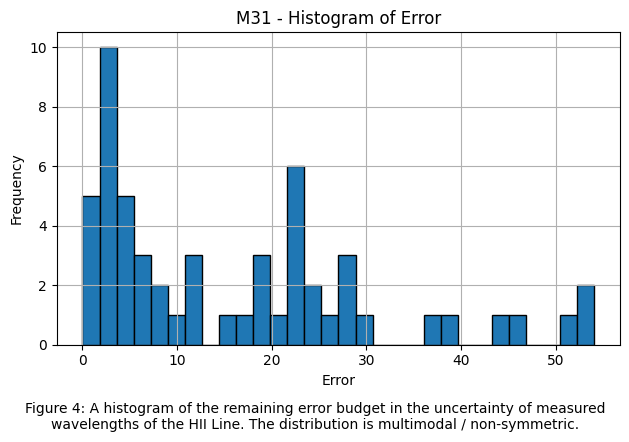

In [372]:
caption = "Figure 4: A histogram of the remaining error budget in the uncertainty of measured wavelengths of the HII Line. The distribution is multimodal / non-symmetric."

plt.hist(m31["err"], bins=30, edgecolor='black', log=False)
plt.title("M31 - Histogram of Error")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid()
plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.15, 1, 1])

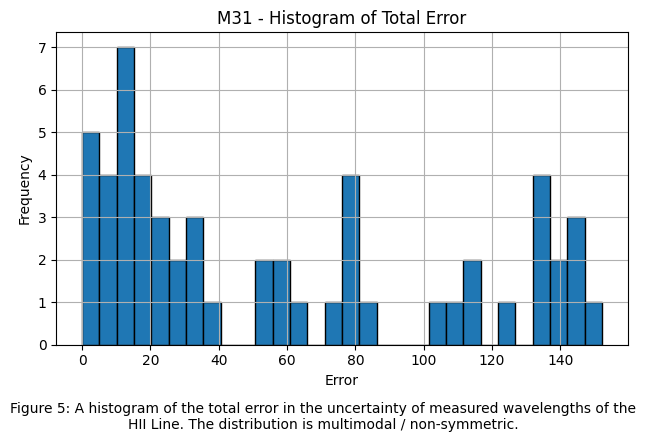

In [373]:
caption = "Figure 5: A histogram of the total error in the uncertainty of measured wavelengths of the HII Line. The distribution is multimodal / non-symmetric."

plt.hist(m31["err_tot"], bins=30, edgecolor='black', log=False)
plt.title("M31 - Histogram of Total Error")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid()
plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.15, 1, 1])

from https://en.wikipedia.org/wiki/Andromeda_Galaxy get the extent of the luminous component of M31 (Andromeda). The distance of the Galaxy multiplied by the angular size will give you this information from basic trigonometry (make sure you convert the units properly, using astropy). Make sure you include the uncertainties! uncertainties in the distance will give you the uncertainty in the size

Assume the distance is 778 $\pm$ 33 kpc
   

In [374]:
apparentSizeM31 = 3.167

In [375]:
# note : by PEP8 standards the import should be at the top, I leave it here for hyou to see that I am using astropy.units now for visibility. Please move it to the top cell
from astropy import units as u
m31angS = apparentSizeM31 * u.degree
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


Please make sure you print a sensible number of decimal digits! you have a  number of significant digits set by the number of digit in the info you get from wikipedia and me

The distance, from Wikipedia, will have an uncertainty. Convert both to kiloparsecs Kpc

In [376]:
dist = 778
dist_error = 33

dist_kpc = dist * u.kpc
dist_error_kpc = dist_error * u.kpc

Calculate and print the distance like I printed the angular size.

To get the physical size of the visible component of Andromeda you can use simple trigonometry: $y = r * sin(\alpha) ~ \sim ~ r \alpha $ for small angles


Print the physical size of the Andromeda galaxy (remember decimal digits, proper formatting etc etc).


In [377]:
print("The distance to Andromeda: " +
      r"{:.0f} +/- {:2.1f}".format(dist_kpc, dist_error_kpc))

The distance to Andromeda: 778 kpc +/- 33.0 kpc


In [378]:
m31angS.to(u.rad)

m31Size = (dist_kpc * m31angS.to(u.rad).value).to(u.kpc)

m31SizeError = (dist_error_kpc * m31angS.to(u.rad).value).to(u.kpc)

print("Size of the visible component of Andromeda: " +
      r"{:.0f} +/- {:2.1f}".format(m31Size, m31SizeError))#, m31SizeError


Size of the visible component of Andromeda: 43 kpc +/- 1.8 kpc


### find the first measurement  in your data table that includes all the luminous mass.

What is the smallest radius in your data where the luminous mass is completely included and what is the veolcity at that radius?
You can do it by broadcasting (see homework 3)

In [379]:
m31_luminous = m31[m31["r"] <= 43 + 1.8]
m31_luminous.tail()

,r,v,dv,err,err_tot
29,19.781,246.140,13.446,1.989,13.592315
30,23.738,236.511,11.729,1.580,11.834942
31,28.485,232.335,16.577,2.106,16.710241
32,34.182,233.530,27.353,3.826,27.619285
33,41.019,230.444,52.432,9.815,53.342749




> The smallest radius in my data where the luminous mass is completely included is 41.019 kpc, with a velocity at that radius of 230.444 km/s.



We expect the velocity to decrease as $1 / \sqrt{r}$ if all mass is included: the velocity at a radius twice as far as the radius that includes all the mass should be a factor $\sqrt{2}$ slower, three times as far a factor $\sqrt{3}$ slower.

write a function that

1. finds the smallest radius in the dataset that is at least N times the radius of the visible galaxy,

2. takes as arguments:
    - the data and
    - N
    - the size of the luminous component of the galaxy

2. Returns the value of the radius and its uncertainty and the velocity and its uncertainty

In [380]:
m31[m31["r"] >= (1 * 43)]["r"].min()

49.222

In [381]:
nRadius = m31[m31["r"] >= (1 * 43)]["r"].min()
print("nRadius = " + str(nRadius))

nRadius = 49.222


In [382]:
velIndex = m31["v"].index[m31["r"] == nRadius][0]
print("velocity index = " + str(velIndex))

velocity index = 34


In [383]:
# first measurement including all mass
def getradii(data, N, lumSize):
  nRadius = data[data["r"] >= (N * lumSize / 2)]["r"].min() * u.kpc
  nRadius_err = m31SizeError / 2 * N

  velIndex = data["v"].index[data["r"] == nRadius.value][0]
  #nRadiusVel = data["v"][velIndex] * u.Unit("km/s")
  nRadiusVel = data["v"][velIndex] * u.km / u.s
  nRadiusVel_err = data["err_tot"][velIndex] * u.km / u.s

  return nRadius, nRadius_err, nRadiusVel, nRadiusVel_err

n = 1
m31Rds = getradii(m31, n, m31Size.value + m31SizeError.value)
print("{} times the radius of the visible component of Andromeda: ".format(n) +
      r"{:.2f} +/- {:2.1f} with a velocity of {:.0f} and error of {:.0f}".format(m31Rds[0], m31Rds[1], m31Rds[2], m31Rds[3]))

1 times the radius of the visible component of Andromeda: 23.74 kpc +/- 0.9 kpc with a velocity of 237 km / s and error of 12 km / s


### data visualization

make a plot that shows

1. the rotational curve of the galaxy (as a line) (e.g. with `df.plot(...)` if your data is stored as a dataframe `df`) showing the uncertainty dv at each quantity (if using `df.plot()` you can use the argument `yerr`)

2. each velocity as an errorbar with error equal to `err_tot` in three different colors of your choice (not black)

3. each velocity as an errorbar with error equal to `dv` in black

4. the datapoint corresponding to N=1, 2, 3 each in a different color.

5. add a legend that indicates the meaning of each color (```pl.legend()```)

6. add a text that indicates the velocity and its uncertainty (dv and err) just below the largest errorbar (```pl.text()``` or ```ax.text()``` if you have an axis object)

7. limit the x axis to the "relevant" portion of the data

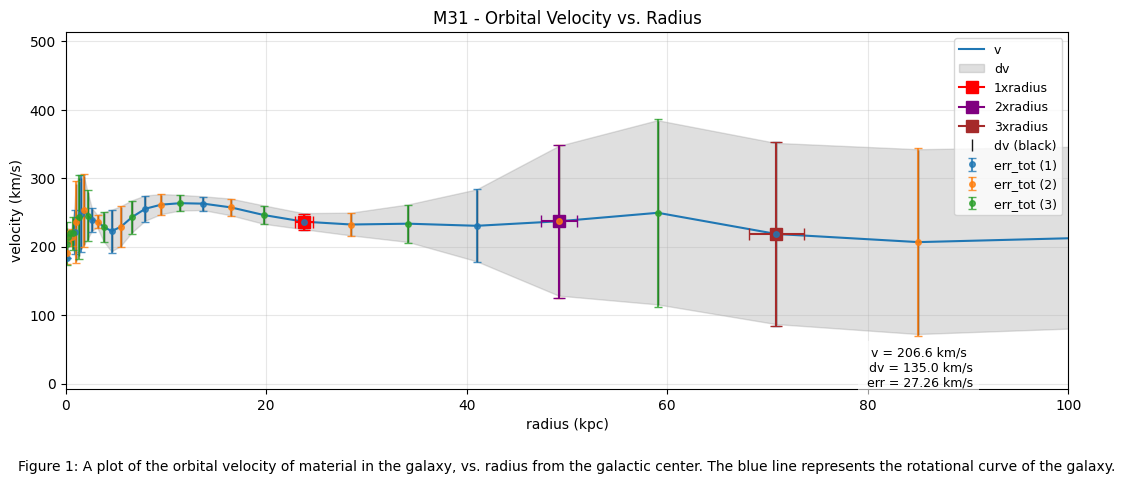

In [384]:
def plotGal(gal, size, lim):
  # ensure plotting vs radius in ascending order
  df = gal.sort_values('r').reset_index(drop=True)

  fig, ax = plt.subplots(figsize=(12,5))

  # 1) rotation curve as a line
  ax.plot(df['r'], df['v'], '-', lw=1.5, label='v')

  # show dv as a faint band around the line (visual uncertainty)
  ax.fill_between(df['r'], df['v'] - df['dv'], df['v'] + df['dv'],
                  color='gray', alpha=0.25, label='dv')

  # 3) each velocity as an errorbar with error equal to dv in black
  ax.errorbar(df['r'], df['v'], yerr=df['dv'], fmt='none', ecolor='k',
              elinewidth=1, alpha=0.9, label='dv (black)')

  # 2) err_tot errorbars in three non-black colors: cycle points into 3 groups
  colors = ['tab:blue', 'tab:orange', 'tab:green']   # three non-black colors
  for i, color in enumerate(colors):
      subset = df.iloc[i::3]   # take every 3rd point starting at i
      ax.errorbar(subset['r'], subset['v'], yerr=subset['err_tot'],
                  fmt='o', color=color, ecolor=color, alpha=0.8,
                  capsize=3, markersize=4, label=f'err_tot ({i+1})')

  # 4) datapoints for N = 1,2,3 (getradii returns r, r_err, v, v_err)
  colors_N = ['red', 'purple', 'brown']
  for i, N in enumerate((1,2,3)):
      rN, rN_err, vN, vN_err = getradii(m31, N, size)   # pass diameter = rds (kpc)
      ax.plot(rN, vN, marker='s', ms=8, color=colors_N[i], label=f'{N}xradius')
      ax.errorbar(rN, vN, xerr=rN_err, yerr=vN_err, fmt='none',
                  ecolor=colors_N[i], capsize=4, elinewidth=1.5)

  # 6) place a text below the largest err_tot errorbar showing v, dv, err
  df_lim = df[df['r'] <= lim]
  idx_max = df_lim['err_tot'].idxmax()
  r_max = float(df.loc[idx_max, 'r']) #~85
  v_max = float(df.loc[idx_max, 'v'])
  dv_max = float(df.loc[idx_max, 'dv'])
  err_max = float(df.loc[idx_max, 'err'])         # the remaining error budget
  errtot_max = float(df.loc[idx_max, 'err_tot'])

  # compute a y position below the errorbar (a bit of padding)
  vmin, vmax = df['v'].min(), df['v'].max()
  y_text = v_max - errtot_max - 0.05*(vmax - vmin)
  txt = f"v = {v_max:.1f} km/s\n dv = {dv_max:.1f} km/s\n err = {err_max:.2f} km/s"
  ax.text(r_max, y_text, txt, ha='center', va='top', fontsize=9,
          bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

  # Plot caption
  caption = "Figure 1: A plot of the orbital velocity of material in the galaxy, vs. radius from the galactic center. The blue line represents the rotational curve of the galaxy."
  ax.text(0.5, -0.2, caption, ha='center', fontsize=10, va='top', transform=ax.transAxes, wrap=True)

  # axis limits, title, labels, legend, grid
  ax.set_title("M31 - Orbital Velocity vs. Radius")
  ax.set_xlim(0, lim)
  ax.set_xlabel('radius (kpc)')
  ax.set_ylabel('velocity (km/s)')
  ax.legend(loc='best', fontsize=9)
  ax.grid(alpha=0.3)

  plt.tight_layout()
  plt.show()

# 7) the "relevent" portion of the data
limit = 100 # kpc

plotGal(m31, m31Size.value + m31SizeError.value, limit);

Write a function that for a given dataset and a given luminous radius and a given N
  
  1) uses the function above ```getradii``` to find the radius at least as large as needed and the velocity at that radius,
  
  2) states the expected drop in rotational velocities according to Newton's law $v\propto 1/\sqrt{r}$
  
  3) calculates the ratio of radii and the ratio of velocities at N radii from the center N=1 and N=N (input, e.g. 2, 3 etc) with uncertainties,
  
  4) and stated whether that ratio is consistent within the uncertainties with Newton's law $v \propto 1/\sqrt{r}$
  
Your function should print

     - the expected ratio based on the radii,
     - the calculated ratio using ```dv```, and its uncertainty, -
     - the 2-$\sigma$ upper and lower limits of the calculated ratio
     - whether the expected ratio is within the $2-\sigma$ of the calculated ratio,
  5) and the same using ```err```  instead of ```dv```

In [385]:
def vratios(data, luminous_diameter, N, err_kind='dv'):
    """
    Compare measured v(N)/v(1) to Newton expectation v ∝ r^(-1/2).

    Parameters
    ----------
    data : pandas.DataFrame
        Must include column 'r' (kpc) and columns for uncertainties like 'dv' and/or 'err'.
    luminous_diameter : float
        Diameter of luminous component (kpc) as passed to getradii (keeps interface from before).
    N : int
        Radius multiplier (e.g. 2 or 3).
    err_kind : str, optional
        Which uncertainty column to use for the measured velocities ('dv' by default,
        or 'err' if you want the remaining error budget). This function will attempt to
        extract that column value for the returned radii. If not found it will use the
        uncertainty returned by getradii.
    """

    # find radii & velocities for N=1 and N=N
    r1, r1_err, v1, v1_err = getradii(data, 1, luminous_diameter)
    rN, rN_err, vN, vN_err = getradii(data, N, luminous_diameter)


    # helper: find nearest row in dataframe to a returned radius and extract the requested uncertainty column if available
    def _get_unc_from_df(radius_value, err_col, fallback_err):
        try:
            # assume 'r' column exists
            idx = (data['r'] - radius_value).abs().idxmin()
            # allow a tiny tolerance check (optional); we'll accept nearest
            if err_col in data.columns:
                val = float(data.loc[idx, err_col])
                return val
            else:
                return float(fallback_err)
        except Exception:
            return float(fallback_err)

    # choose which uncertainty to use for the measured velocities
    v1_unc = _get_unc_from_df(r1, err_kind, v1_err)
    vN_unc = _get_unc_from_df(rN, err_kind, vN_err)


    def _to_value(x, unit):
      """
      Convert x to a plain float in given astropy unit.
      If x is an astropy Quantity, convert; otherwise cast to float.
      """
      if isinstance(x, u.Quantity):
          return x.to(unit).value
      else:
          return float(x)


    # coerce returned values to floats in expected units:
    # radii -> kpc, velocities -> km/s, velocity-uncerts -> km/s
    r1 = _to_value(r1, u.kpc)
    r1_err = _to_value(r1_err, u.kpc)
    rN = _to_value(rN, u.kpc)
    rN_err = _to_value(rN_err, u.kpc)

    v1 = _to_value(v1, u.km / u.s)
    vN = _to_value(vN, u.km / u.s)

    # --- expected ratio from Newton: v_N / v_1 = sqrt(r1 / rN)
    expected_ratio = np.sqrt(r1 / rN)
    # propagate uncertainties on r1 and rN into expected_ratio:
    # (σE/E)^2 = 1/4 * [ (σr1/r1)^2 + (σrN/rN)^2 ]
    frac_r1 = (r1_err / r1) if r1 > 0 else 0.0
    frac_rN = (rN_err / rN) if rN > 0 else 0.0
    expected_frac_err = 0.5 * np.sqrt(frac_r1**2 + frac_rN**2)
    expected_ratio_unc = expected_ratio * expected_frac_err

    # --- measured ratio and its uncertainty (assume v1 and vN uncorrelated)
    if v1 == 0 or vN == 0:
        raise ValueError("v1 or vN is zero which prevents ratio/error propagation.")
    measured_ratio = vN / v1
    measured_ratio_unc = measured_ratio * np.sqrt((vN_unc / vN)**2 + (v1_unc / v1)**2)

    # two-sigma interval for measured ratio
    measured_lo_2sigma = measured_ratio - 2 * measured_ratio_unc
    measured_hi_2sigma = measured_ratio + 2 * measured_ratio_unc

    # check consistency: expected_ratio within measured 2-sigma?
    consistent = (expected_ratio >= measured_lo_2sigma) and (expected_ratio <= measured_hi_2sigma)

    # print results
    print(f"--- vratios (using '{err_kind}' uncertainties) ---")
    print(f"Radii returned: r1 = {r1:.3f} ± {r1_err:.3f} kpc, r{N} = {rN:.3f} ± {rN_err:.3f} kpc")
    print()
    print(f"Expected ratio from Newton (v_N / v_1 = sqrt(r1/rN)):")
    print(f"  expected = {expected_ratio:.4f} ± {expected_ratio_unc:.4f} (1σ from radii)")
    print()
    print("Measured ratio (using measured velocities and uncertainties):")
    print(f"  measured = {measured_ratio:.4f} ± {measured_ratio_unc:.4f} (1σ, using '{err_kind}')")
    print(f"  2σ lower = {measured_lo_2sigma:.4f}")
    print(f"  2σ upper = {measured_hi_2sigma:.4f}")
    print()
    print(f"Is the expected ratio within the measured 2σ interval? {'YES' if consistent else 'NO'}")
    print()

In [386]:
m31_lum_diam = m31Size.value + m31SizeError.value
m31_lum_diam

np.float64(44.82768228004559)

In [387]:


vratios(m31, m31_lum_diam, 1)

#vratios(m31, m31Rds, 1, err='err')

--- vratios (using 'dv' uncertainties) ---
Radii returned: r1 = 23.738 ± 0.912 kpc, r1 = 23.738 ± 0.912 kpc

Expected ratio from Newton (v_N / v_1 = sqrt(r1/rN)):
  expected = 1.0000 ± 0.0272 (1σ from radii)

Measured ratio (using measured velocities and uncertainties):
  measured = 1.0000 ± 0.0701 (1σ, using 'dv')
  2σ lower = 0.8597
  2σ upper = 1.1403

Is the expected ratio within the measured 2σ interval? YES



In [388]:
vratios(m31, m31_lum_diam, 1, err_kind='err')

--- vratios (using 'err' uncertainties) ---
Radii returned: r1 = 23.738 ± 0.912 kpc, r1 = 23.738 ± 0.912 kpc

Expected ratio from Newton (v_N / v_1 = sqrt(r1/rN)):
  expected = 1.0000 ± 0.0272 (1σ from radii)

Measured ratio (using measured velocities and uncertainties):
  measured = 1.0000 ± 0.0094 (1σ, using 'err')
  2σ lower = 0.9811
  2σ upper = 1.0189

Is the expected ratio within the measured 2σ interval? YES



In [389]:
vratios(m31, m31_lum_diam, 2)

--- vratios (using 'dv' uncertainties) ---
Radii returned: r1 = 23.738 ± 0.912 kpc, r2 = 49.222 ± 1.824 kpc

Expected ratio from Newton (v_N / v_1 = sqrt(r1/rN)):
  expected = 0.6945 ± 0.0185 (1σ from radii)

Measured ratio (using measured velocities and uncertainties):
  measured = 1.0024 ± 0.4651 (1σ, using 'dv')
  2σ lower = 0.0721
  2σ upper = 1.9326

Is the expected ratio within the measured 2σ interval? YES



In [390]:
vratios(m31, m31_lum_diam, 2, err_kind='err')

--- vratios (using 'err' uncertainties) ---
Radii returned: r1 = 23.738 ± 0.912 kpc, r2 = 49.222 ± 1.824 kpc

Expected ratio from Newton (v_N / v_1 = sqrt(r1/rN)):
  expected = 0.6945 ± 0.0185 (1σ from radii)

Measured ratio (using measured velocities and uncertainties):
  measured = 1.0024 ± 0.1014 (1σ, using 'err')
  2σ lower = 0.7996
  2σ upper = 1.2051

Is the expected ratio within the measured 2σ interval? NO



### Discuss!


---


## do the same for the Milky Way. If your functions were create properly you should be able to reuse them seamlessly

---



In [391]:
#delete all below

https://en.wikipedia.org/wiki/Milky_Way
    

In [392]:
mw = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/refs/heads/main/HW4/mw.csv", skiprows=1, sep=",")
mw = mw.rename({"R(kpc)": "r", "V(km/s)": "v", "St.dev.": "dv", "St.error": "err"}, axis=1)
mw["err_tot"] = np.hypot(mw["dv"], mw["err"])

mw.head()

,r,v,dv,err,err_tot
0,0.010,119.061,41.832,32.714,53.104821
1,0.012,115.268,35.199,17.100,39.132846
2,0.014,117.392,35.152,14.429,37.998147
3,0.017,118.475,35.252,14.870,38.259906
4,0.021,110.386,33.817,14.427,36.765851


In [393]:
mw.shape

(64, 5)

In [394]:
mw.describe()

,r,v,dv,err,err_tot
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249063,19.003297,52.371692
std,348.144773,52.161901,41.255286,23.513466,46.907703
min,0.010000,93.042000,3.370000,0.868000,3.736562
25%,0.177250,138.676250,12.585500,2.709750,13.190724
50%,3.133500,204.576000,35.288500,13.923000,38.696376
75%,55.298250,235.920500,68.412750,24.791250,73.655114
max,1682.532000,255.300000,165.096000,110.484000,197.217605


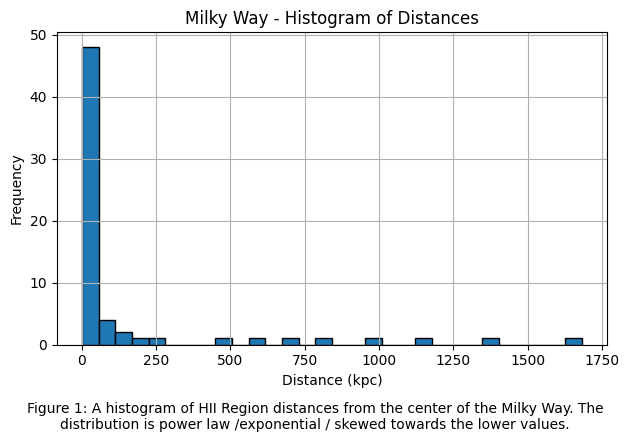

In [395]:
caption = "Figure 1: A histogram of HII Region distances from the center of the Milky Way. The distribution is power law /exponential / skewed towards the lower values."

plt.hist(mw["r"], bins=30, edgecolor='black', log=False)
plt.title("Milky Way - Histogram of Distances")
plt.xlabel("Distance (kpc)")
plt.ylabel("Frequency")
plt.grid()
plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.15, 1, 1])

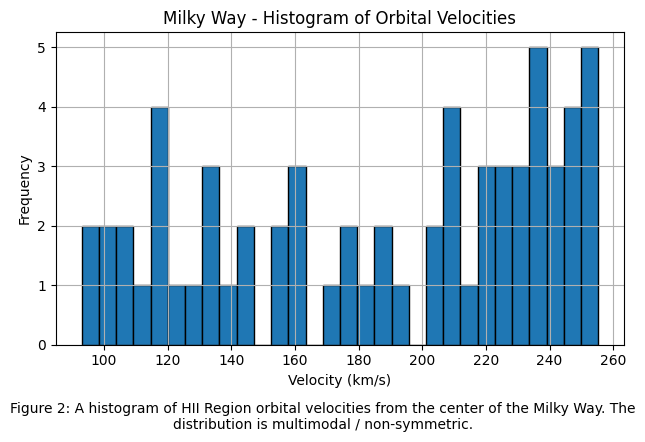

In [396]:
caption = "Figure 2: A histogram of HII Region orbital velocities from the center of the Milky Way. The distribution is multimodal / non-symmetric."

plt.hist(mw["v"], bins=30, edgecolor='black', log=False)
plt.title("Milky Way - Histogram of Orbital Velocities")
plt.xlabel("Velocity (km/s)")
plt.ylabel("Frequency")
plt.grid()
plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.15, 1, 1])

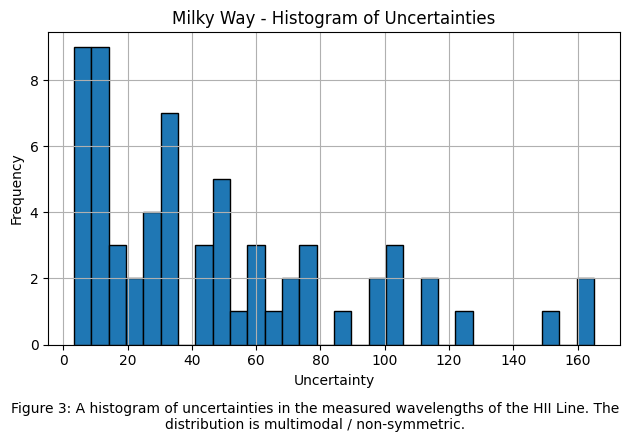

In [397]:
caption = "Figure 3: A histogram of uncertainties in the measured wavelengths of the HII Line. The distribution is multimodal / non-symmetric."

plt.hist(mw["dv"], bins=30, edgecolor='black', log=False)
plt.title("Milky Way - Histogram of Uncertainties")
plt.xlabel("Uncertainty")
plt.ylabel("Frequency")
plt.grid()
plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.15, 1, 1])

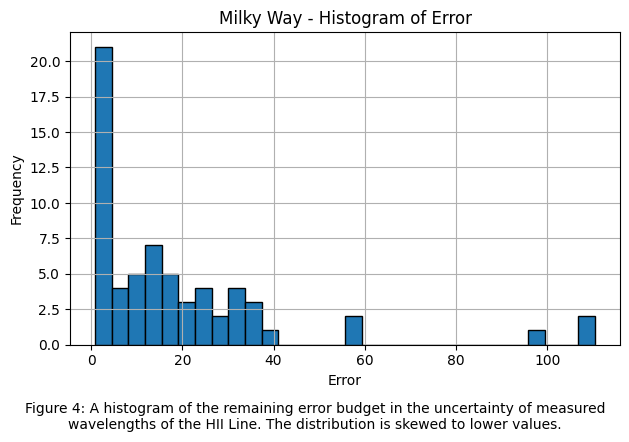

In [398]:
caption = "Figure 4: A histogram of the remaining error budget in the uncertainty of measured wavelengths of the HII Line. The distribution is skewed to lower values."

plt.hist(mw["err"], bins=30, edgecolor='black', log=False)
plt.title("Milky Way - Histogram of Error")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid()
plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.15, 1, 1])

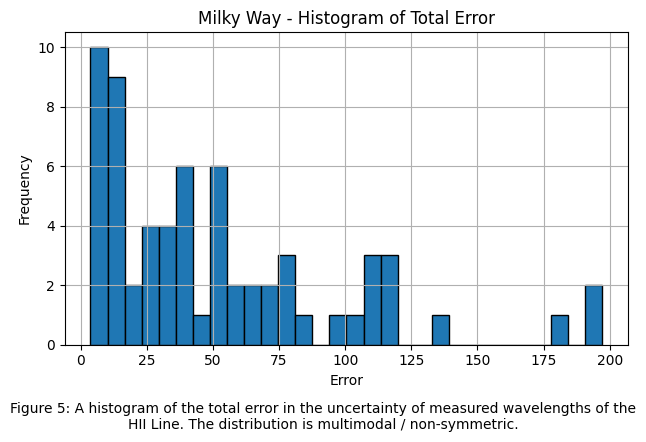

In [399]:
caption = "Figure 5: A histogram of the total error in the uncertainty of measured wavelengths of the HII Line. The distribution is multimodal / non-symmetric."

plt.hist(mw["err_tot"], bins=30, edgecolor='black', log=False)
plt.title("Milky Way - Histogram of Total Error")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid()
plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.15, 1, 1])

In [400]:
mwSize = 26.8 * u.kpc
mwSize_err = 1.1 * u.kpc
mw_lum_diam = mwSize.value + mwSize_err.value

n = 1  # 1 x the radius of the galaxy's luminous content
mwRds = getradii(mw, n, mw_lum_diam)
print("{} times the radius of the visible component of the Milky Way: ".format(n) +
      r"{:.2f} +/- {:2.1f} with a velocity of {:.0f} and error of {:.0f}".format(mwRds[0], mwRds[1], mwRds[2], mwRds[3]))

1 times the radius of the visible component of the Milky Way: 14.70 kpc +/- 0.9 kpc with a velocity of 247 km / s and error of 42 km / s


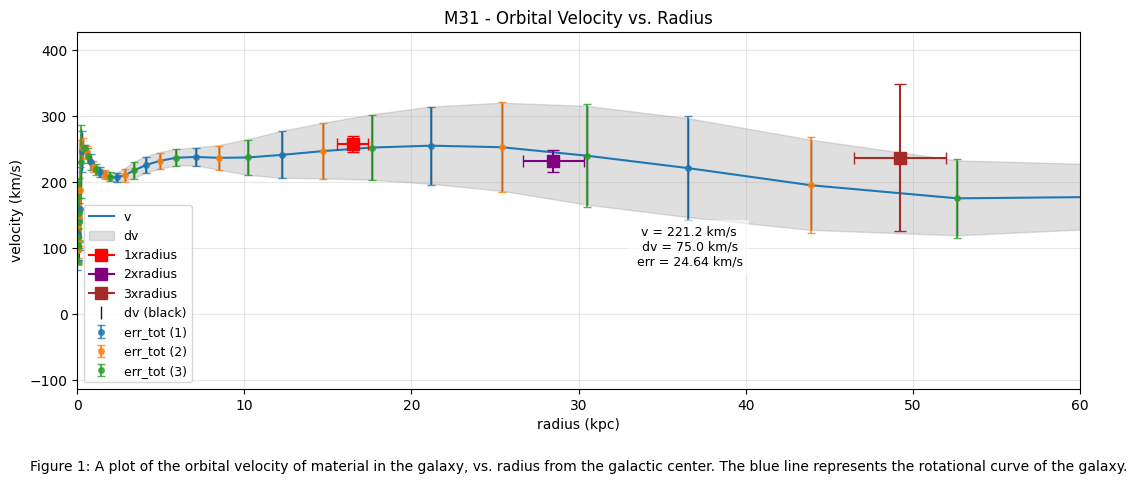

In [401]:
# The "relevent" portion of the data
limit = 60 # kpc

plotGal(mw, mw_lum_diam, limit);

In [402]:
vratios(mw, mw_lum_diam, 1)

--- vratios (using 'dv' uncertainties) ---
Radii returned: r1 = 14.698 ± 0.912 kpc, r1 = 14.698 ± 0.912 kpc

Expected ratio from Newton (v_N / v_1 = sqrt(r1/rN)):
  expected = 1.0000 ± 0.0439 (1σ from radii)

Measured ratio (using measured velocities and uncertainties):
  measured = 1.0000 ± 0.2410 (1σ, using 'dv')
  2σ lower = 0.5180
  2σ upper = 1.4820

Is the expected ratio within the measured 2σ interval? YES



In [403]:
vratios(mw, mw_lum_diam, 1, err_kind='err')

--- vratios (using 'err' uncertainties) ---
Radii returned: r1 = 14.698 ± 0.912 kpc, r1 = 14.698 ± 0.912 kpc

Expected ratio from Newton (v_N / v_1 = sqrt(r1/rN)):
  expected = 1.0000 ± 0.0439 (1σ from radii)

Measured ratio (using measured velocities and uncertainties):
  measured = 1.0000 ± 0.0233 (1σ, using 'err')
  2σ lower = 0.9534
  2σ upper = 1.0466

Is the expected ratio within the measured 2σ interval? YES



In [404]:
vratios(mw, mw_lum_diam, 2)

--- vratios (using 'dv' uncertainties) ---
Radii returned: r1 = 14.698 ± 0.912 kpc, r2 = 30.477 ± 1.824 kpc

Expected ratio from Newton (v_N / v_1 = sqrt(r1/rN)):
  expected = 0.6945 ± 0.0299 (1σ from radii)

Measured ratio (using measured velocities and uncertainties):
  measured = 0.9720 ± 0.3454 (1σ, using 'dv')
  2σ lower = 0.2813
  2σ upper = 1.6628

Is the expected ratio within the measured 2σ interval? YES



In [405]:
vratios(mw, mw_lum_diam, 2, err_kind='err')

--- vratios (using 'err' uncertainties) ---
Radii returned: r1 = 14.698 ± 0.912 kpc, r2 = 30.477 ± 1.824 kpc

Expected ratio from Newton (v_N / v_1 = sqrt(r1/rN)):
  expected = 0.6945 ± 0.0299 (1σ from radii)

Measured ratio (using measured velocities and uncertainties):
  measured = 0.9720 ± 0.0847 (1σ, using 'err')
  2σ lower = 0.8027
  2σ upper = 1.1413

Is the expected ratio within the measured 2σ interval? NO

